In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt

In [ ]:
# from IPython.testing import test
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

#Checking the shape of X_train (image nos, image pixel, image pixel, channels)
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

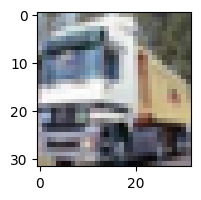

In [ ]:
plt.figure(figsize=(10, 2))

#frog
plt.imshow(X_train[0])

#truck
plt.imshow(X_train[1])

In [ ]:
#Normalizing pixel values between 0 and 1
X_train = X_train/255
X_test = X_test/255

In [ ]:
#ANN
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer= 'SGD',
            loss= 'sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 134s 85ms/step - loss: 1.8126 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 126s 80ms/step - loss: 1.6258 - accuracy: 0.4260
Epoch 3/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.5445 - accuracy: 0.4566
Epoch 4/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.4827 - accuracy: 0.4797
Epoch 5/5
1563/1563 [==============================] - 128s 82ms/step - loss: 1.4335 - accuracy: 0.4938


In [ ]:
ann.evaluate(X_test, Y_test)

313/313 [==============================] - 9s 30ms/step - loss: 1.4542 - accuracy: 0.4868


[1.4542304277420044, 0.4867999851703644]

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(Y_test, y_pred_classes))

313/313 [==============================] - 9s 29ms/step
              precision    recall  f1-score   support

           0       0.57      0.50      0.53      1000
           1       0.54      0.63      0.58      1000
           2       0.39      0.38      0.38      1000
           3       0.35      0.32      0.33      1000
           4       0.54      0.30      0.38      1000
           5       0.43      0.30      0.36      1000
           6       0.56      0.49      0.53      1000
           7       0.51      0.58      0.54      1000
           8       0.50      0.73      0.60      1000
           9       0.48      0.64      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [ ]:
#Now implementing CNN
cnn = models.Sequential([

    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape= (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    #Can add multiple Conv2D and MaxPooling layers.....through trial and error
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
#softmax normalizes the value

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 68s 42ms/step - loss: 1.5651 - accuracy: 0.4254
Epoch 2/20
1563/1563 [==============================] - 66s 43ms/step - loss: 1.1856 - accuracy: 0.5804
Epoch 3/20
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0291 - accuracy: 0.6397
Epoch 4/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9311 - accuracy: 0.6757
Epoch 5/20
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8588 - accuracy: 0.6998
Epoch 6/20
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8048 - accuracy: 0.7195
Epoch 7/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7572 - accuracy: 0.7364
Epoch 8/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7200 - accuracy: 0.7472
Epoch 9/20
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6816 - accuracy: 0.7632
Epoch 10/20
1563/1563 [==============================] - 66s 42m

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(Y_test, y_pred_classes))